# 

In [1]:
# Train a unet segmentation model 
import torch
from tqdm.auto import tqdm
from utils.person_segmentation import PersonSegmentationModelUNet
from utils.semantic_kitti_dataset import SemanticKittiDataset
# from model.resnetunet import ResNetUNet
import matplotlib.pyplot as plt

import numpy as np

/data_ssd/home/raphael/miniconda3/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
print('Creating model and dataset...')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PersonSegmentationModelUNet(in_channels=5, out_channels=1).to(device)
# model = ResNetUNet(in_channels=5, out_channels=22).to(device)
dataset = SemanticKittiDataset('.', transform=None, split='train')
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

Creating model and dataset...


Image shape: (64, 1024, 5)
Label shape: (64, 1024, 1)


<Figure size 1000x1000 with 0 Axes>

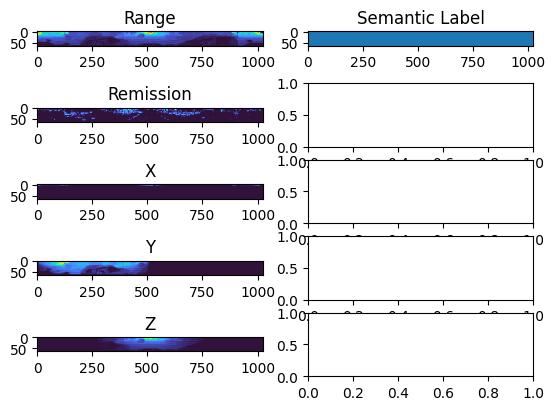

In [3]:
dataset.show(96)

In [ ]:
# for n, i in enumerate(dataset):
#     if 1 in dataset[n][1]:
#         print(n)

In [ ]:
# for i, m in dataset:
#     print(np.unique(m))
#     # if 30 in m.astype(int):
#     #     print("found person")
#     #     plt.imshow(i)
#     #     break
i, m = dataset[96]
# m = (m == 30)

In [ ]:
# np.unique(m)

In [ ]:
#dataset.show(0)

print('Creating loss and optimizer...')
# criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print('Training model...')
it = tqdm(dataloader)
for epoch in tqdm(range(10)):
    for x, y in it:
        #print(x.shape, y.shape)
        #print(x.dtype, y.dtype)
        x = x.to(device)
        y = y.to(device)
        with torch.cuda.amp.autocast():
            y_pred = model(x)
            #print(type(y_pred), y_pred.shape)
            loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # show loss in tqdm
        # it.set_postfix(loss = "loss.item())
        #tqdm.write("WOrking")
        print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')


Creating loss and optimizer...
Training model...


  0%|          | 0/908 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Loss: 0.7846
Epoch [1/10], Loss: 0.7314
Epoch [1/10], Loss: 0.6604
Epoch [1/10], Loss: 0.6190
Epoch [1/10], Loss: 0.5798
Epoch [1/10], Loss: 0.5487
Epoch [1/10], Loss: 0.5258
Epoch [1/10], Loss: 0.5097
Epoch [1/10], Loss: 0.4885
Epoch [1/10], Loss: 0.4713
Epoch [1/10], Loss: 0.4619
Epoch [1/10], Loss: 0.4498
Epoch [1/10], Loss: 0.4410
Epoch [1/10], Loss: 0.4353
Epoch [1/10], Loss: 0.4290
Epoch [1/10], Loss: 0.4193
Epoch [1/10], Loss: 0.4101
Epoch [1/10], Loss: 0.4043
Epoch [1/10], Loss: 0.3977
Epoch [1/10], Loss: 0.3931
Epoch [1/10], Loss: 0.3875
Epoch [1/10], Loss: 0.3827
Epoch [1/10], Loss: 0.3824
Epoch [1/10], Loss: 0.3780
Epoch [1/10], Loss: 0.3820
Epoch [1/10], Loss: 0.3687
Epoch [1/10], Loss: 0.3592
Epoch [1/10], Loss: 0.3538
Epoch [1/10], Loss: 0.3523
Epoch [1/10], Loss: 0.3468
Epoch [1/10], Loss: 0.3436
Epoch [1/10], Loss: 0.3395
Epoch [1/10], Loss: 0.3314
Epoch [1/10], Loss: 0.3296
Epoch [1/10], Loss: 0.3218
Epoch [1/10], Loss: 0.3143
Epoch [1/10], Loss: 0.3125
E